In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist, mnist
from sklearn.manifold import Isomap

In [41]:
(x_tr,y_tr),(x_te,y_te) = fashion_mnist.load_data()
flat_shape = (10000,28*28)
# x_te = x_te.reshape((10000,28*28))

In [20]:
class_maps = [y_te==n for n in np.arange(10)]

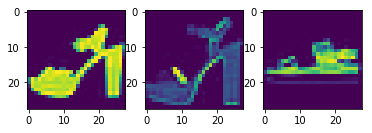

In [40]:
class_id = 5
num_examples = 3
x_te_class = x_te[class_maps[class_id]]
ex_idxs = np.random.choice(np.arange(len(x_te_class)),num_examples)

fig,axs = plt.subplots(1,num_examples)
for im,ax in zip(x_te_class[ex_idxs],axs):
    ax.imshow(im)
# plt.imshow(x_te_class[ex_idxs[0]])

In [208]:
iso_embed = [Isomap(n_neighbors=5,n_components=1).fit_transform(x_te.reshape(flat_shape)[class_maps[i]]) for i in np.arange(10)]
orig_idx = [np.arange(10000)[class_maps[i]] for i in np.arange(10)]

In [209]:
def make_gallery(X,nrows,ncols):
    
    nindex, height, width = X.shape
    X_out = X.reshape(nrows, ncols, height, width).swapaxes(1,2).reshape(height*nrows, width*ncols)
    
    return X_out

def make_class_row(x_ims,x_iso,cmap='gray'):
    x_ims_sorted = sorted(zip(x_ims,x_iso),key=lambda pair: pair[1])
    sorted_ims = [np.array(p[0]).reshape((1,784)) for p in x_ims_sorted]
    sorted_iso = [p[1] for p in x_ims_sorted]
    ex_idxs = [0,1,2,499,500,501,997,998,999]
    num_ex = len(ex_idxs)
    
    X = np.concatenate([im.reshape((1,28,28)) for im in sorted_ims])
    X_ex = X[ex_idxs]
    X_out = make_gallery(X_ex,nrows=1,ncols=9)
    
#     plt.imshow(X_out,cmap=cmap)
    return sorted_ims,sorted_iso,X_out

def plot_isomap_grid(X_ims,X_isos,cmap='gray'):
    rows = []
    for x_c,x_i in zip(X_ims,X_isos):
        _,_,row = make_class_row(x_c,x_i,cmap=cmap)
        rows.append(row.reshape(1,28,252))
    rows = np.concatenate(rows)
    im_grid = make_gallery(rows,nrows=10,ncols=1)
    print(im_grid.shape)
    return im_grid

(280, 252)


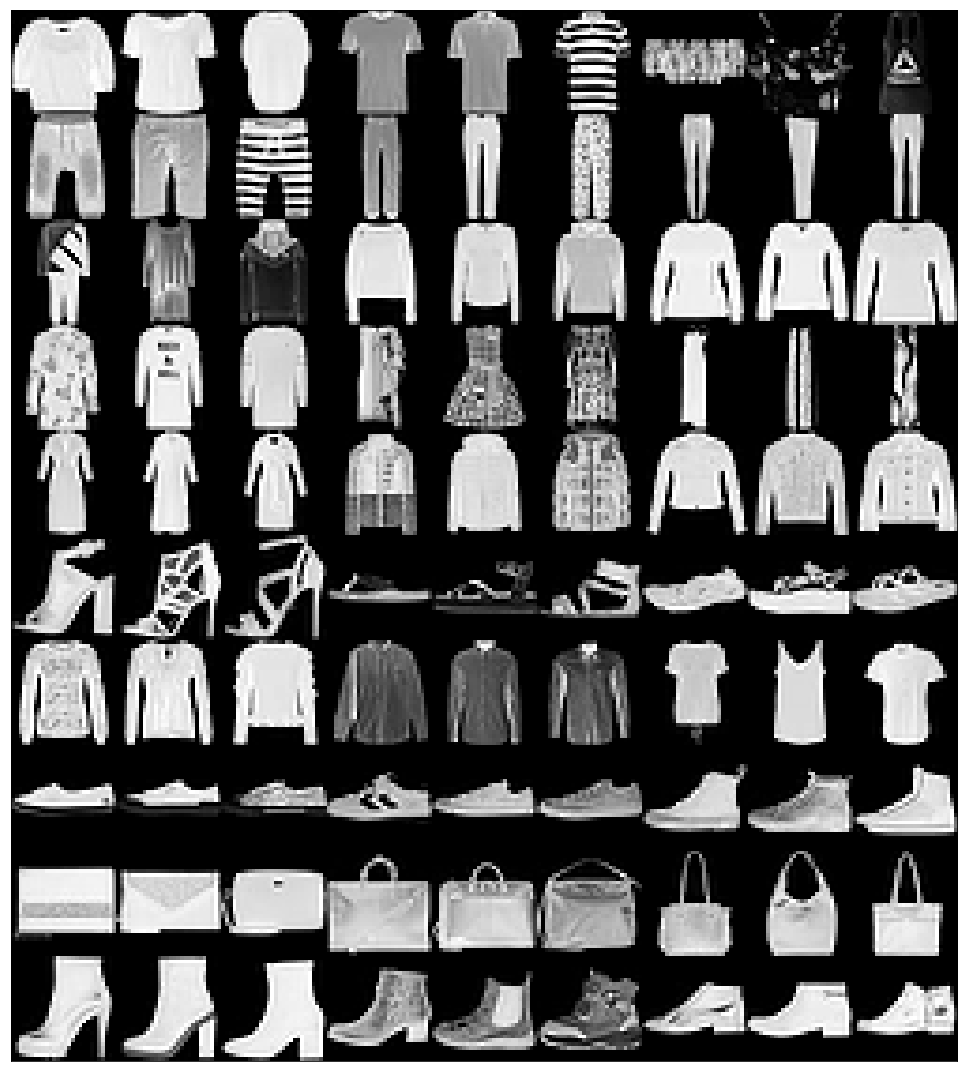

In [210]:
x_all = [x_te.reshape(flat_shape)[class_idxs] for class_idxs in class_maps]
im_grid = plot_isomap_grid(x_all,iso_embed)
fig,ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(im_grid,cmap='gray')
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
fig.savefig('../figures/style_embeddings/isomap_5_neighbor_fashion.png')

In [211]:
recs = {'class_id':[],'test_idx':[],'isomap_dim_1':[]}
for cid,idx,iso in zip(np.arange(10),orig_idx,iso_embed):
    recs['class_id'].extend([cid]*1000)
    recs['test_idx'].extend(idx)
    recs['isomap_dim_1'].extend([v[0] for v in iso])

In [212]:
df = pd.DataFrame.from_records(recs)
df.to_pickle('../data/style_embeddings/fashion_mnist_isomap_5_neighbor.pk')

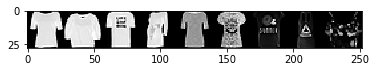

In [166]:
x_ims,x_isos = make_class_row(x_te.reshape(flat_shape)[class_maps[class_id]],iso_embed[class_id])

In [136]:
ex_idxs = [0,1,2,499,500,501,997,998,999]



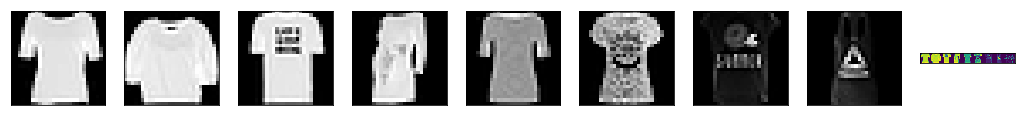

In [140]:
class_id = 0


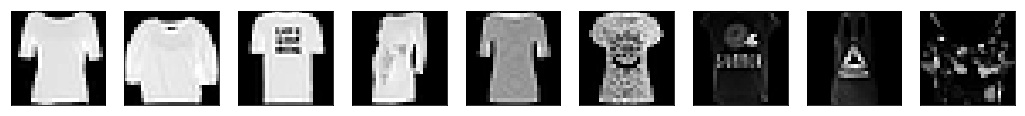

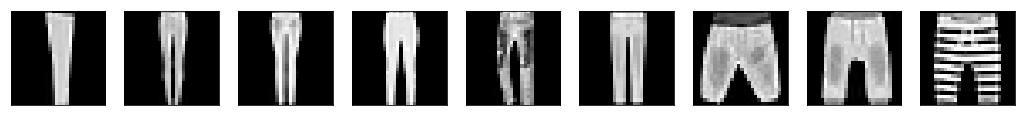

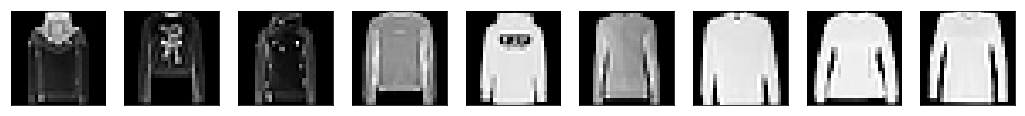

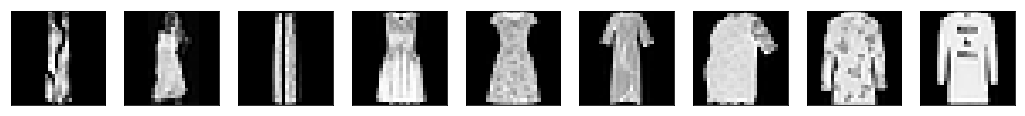

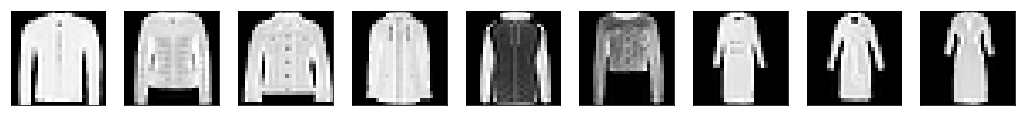

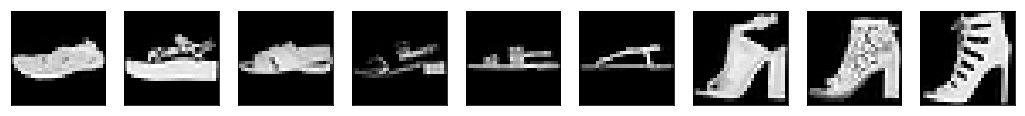

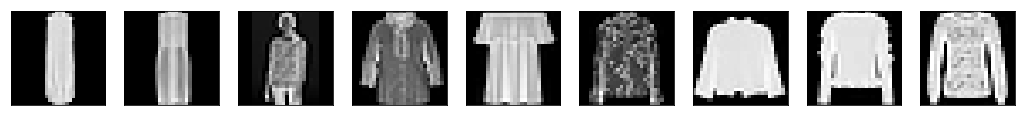

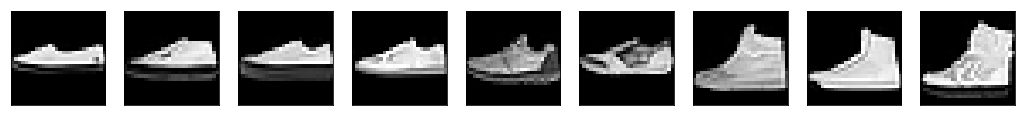

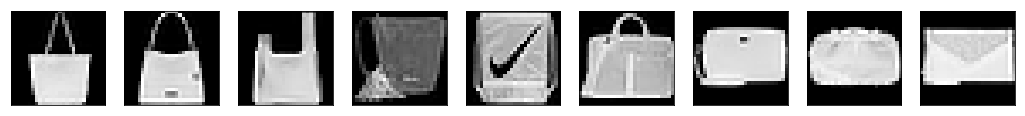

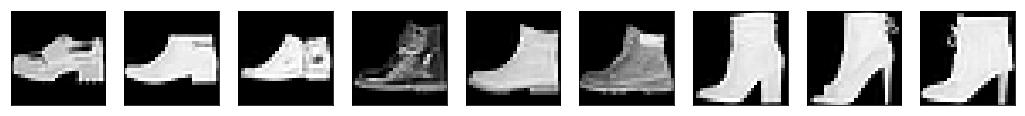

In [145]:
rows = []
for cid in np.arange(10):
    x_ims,x_isos = plot_isomap_grid(x_te.reshape(flat_shape)[class_maps[cid]],iso_embed[cid])
    
    class_row = make_gallery(X[ex_idxs],nrows=1,ncols=9)
    rows.append(class_row)

In [153]:
rows = np.concatenate([r.reshape(1,28,252) for r in rows])

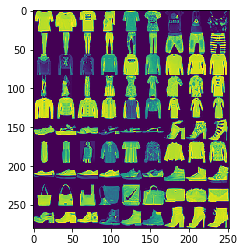

In [155]:
plt.imshow(make_gallery(rows,10,1))

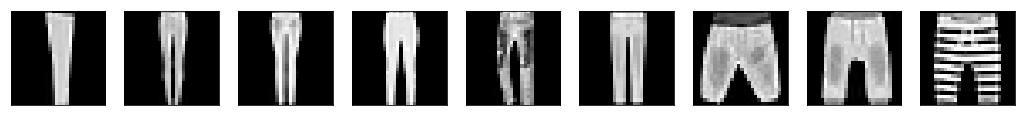

In [142]:
class_id = 1
x_ims,x_isos = plot_isomap_grid(x_te.reshape(flat_shape)[class_maps[class_id]],iso_embed[class_id])

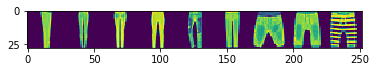

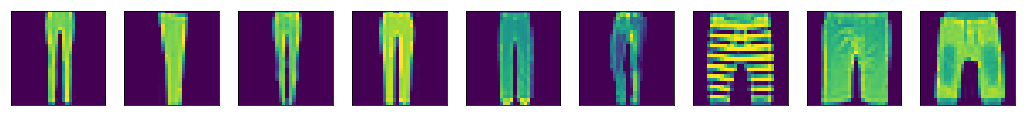

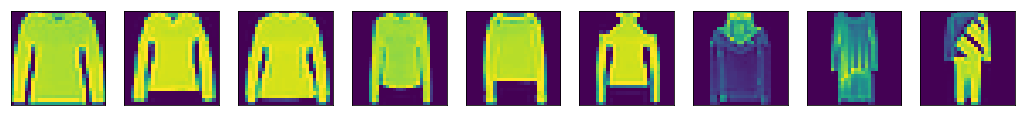

In [100]:
class_id = 2
x_ims,x_isos = plot_isomap_grid(x_te.reshape(flat_shape)[class_maps[class_id]],iso_embed[class_id],cmap='gray')

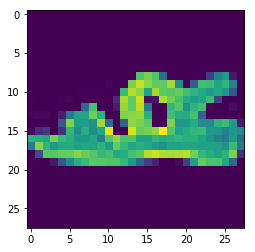

In [71]:
plt.imshow(x_ims[3].reshape((28,28)))

In [45]:
# iso = Isomap(n_components=1,)


(array([ 26.,  90., 202., 209.,  64.,  66., 109., 134.,  86.,  14.]),
 array([-5215.97109468, -4080.75315948, -2945.53522428, -1810.31728909,
         -675.09935389,   460.11858131,  1595.33651651,  2730.55445171,
         3865.77238691,  5000.9903221 ,  6136.2082573 ]),
 <a list of 10 Patch objects>)

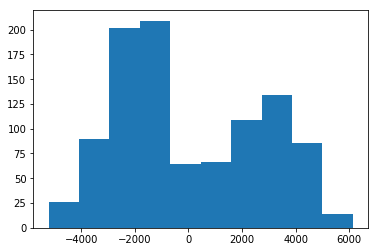

In [46]:
plt.hist(iso_embed[5])